# A Machine Learning Model to Predict Customer Churn

![Project Image]("C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Machine_Learning_Project\1_VhF3Ibprkk9DsMAyQZ20eg.jpg")

## **Project Description**
The goal of this project is to develop a supervised machine learning model to analyze customer attrition within the Vodafone telecom company. The model will utilize any provided dataset to generate new observations by accurately determining whether a customer is likely to churn or not. This initiative aims to provide valuable insights into customer behavior, enabling the identification of potential churn and facilitating strategic interventions to retain customers effectively. The outcome of the project will contribute to a more informed and proactive approach to customer relationship management within Vodafone.

#### The data set includes information about:

* Customers who left within the company  — the column is called Churn.
* Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information — how long they’ve been a customer (Tenure ), contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers — gender, age range, and if they have partners and dependents
Demographics
CustomerID: A unique ID that identifies each customer.
* Senior Citizen: Indicates if the customer is older: Yes, No
* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
* Tenure in Months: Indicates the total amount of months that the customer has been with the company 
* total charges is  equal to each tenue times monthly charges.
* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

## **Hypothesis Testing**




**Null Hypothesis (H0):**
- H0: There is no significant relationship between customer churn and the type of contract.

**Alternative Hypothesis (H1):**
- H1: There is a significant relationship between customer churn and the type of contract.








## **Analytical Questions**
1. What is the overall count of customers who have discontinued their services with the company?

2. Which contract type exhibits a higher number of customers who have left the company?

3. How does the rate of customer churn change in relation to the duration of their subscription? (Visualized with a line chart)

4. Is there a correlation between the total charges accrued by customers and the type of contract they have? (Visualized with a bar chart)
5. What are the preferred payment methods?

### Step1: Import Libraries

#### Import Libraries

In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings 

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


### Step2: Data Loading
The data for this project is divided into three parts

#### First Data set 

The first dataset is stored in a Mcrosoft Sql Server . I will  connect to it remotely by using the  **pyodbc** library .






In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [4]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [5]:
# Use the connect method of the pyodbc library and connect to the server . 


connection = pyodbc.connect(connection_string)

In [6]:
# The sql query to get the data 

query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

data1 = pd.read_sql(query, connection)

In [7]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [8]:
data1.shape

(3000, 21)

###  Second Dataset

* The second dataset for this project was found on OneDrive and is in CSV format.
* This dataset will serve as the test dataset.

In [9]:
data2 = pd.read_csv(r"C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Machine_Learning_Project\Telco-churn-last-2000.csv")

In [10]:
data2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [11]:
data2.shape

(2000, 20)

### Third Dataset 


In [12]:
data3 = pd.read_csv(r"C:\Users\pasca\OneDrive\Desktop\PaccyDEM\LP2_Telco-churn-second-2000.csv")

In [13]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [14]:
data3.shape

(2043, 21)

## Step3 : Data Inspecting 

### Data1

In [15]:
data1.head()             # Displaying the first few rows of the DataFrame 'data1' to inspect the data structure



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [16]:
data1.shape         # Checking the dimensions (number of rows and columns) of the DataFrame 'data1'



(3000, 21)

In [17]:
data1.info()             # Displaying concise information about the DataFrame 'data1', including data types and non-null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


##### Check for null values

In [18]:
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

###  Calculate and display the percentage of null values for each column in 'data1'


In [19]:
# Calculate the percentage of null values for each column in 'data1'
null_percentages = (data1.isnull().sum() / len(data1)) * 100

# Display the result
print("Percentage of null values for each column in 'data1':")
print(null_percentages)


Percentage of null values for each column in 'data1':
customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64


#### Check for duplicate 

In [20]:
data1.duplicated().sum()  # No duplicates were found.


0

In [21]:
data1.describe().T  # Generate descriptive statistics for numerical columns in 'data1' and transpose the result


,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


## Inspecting Column by column 
 however, only a subset of columns is presented for the sake of time constraints.


In [22]:
data1["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [23]:

result = data1[data1['tenure'] == 0]  # 0 means the customer has been with the company for less than one mont
result                                 #  This is due to the representation of tenure in months.



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False


In [24]:
data1["PhoneService"].unique()

array([False,  True])

In [25]:
data1["MultipleLines"].unique()

array([None, False, True], dtype=object)

In [26]:
multuplelines_null_count = data1["MultipleLines"].isnull().sum()             # # Count the number of null values in the 'MultipleLines' column

multuplelines_null_count


269

In [27]:
data1["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [28]:
internet_service_count = data1['InternetService'].eq('No').sum()
internet_service_count

651

In [29]:
data1["OnlineSecurity"].unique()

array([False, True, None], dtype=object)

In [30]:
data1["StreamingMovies"].unique()

array([False, True, None], dtype=object)

In [31]:
data1["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [32]:
data1.Contract.value_counts()      ## Count the occurrences of each unique value in the 'Contract' column and display the result


Contract
Month-to-month    1641
Two year           746
One year           613
Name: count, dtype: int64

In [33]:
data1["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [34]:
data1.PaymentMethod.value_counts()            ## Count the occurrences of each unique value in the 'paymentmethod' column and display the result

PaymentMethod
Electronic check             1004
Bank transfer (automatic)     687
Credit card (automatic)       657
Mailed check                  652
Name: count, dtype: int64

In [35]:
data1["MonthlyCharges"].unique()

array([29.85000038, 56.95000076, 53.84999847, ..., 33.90000153,
       34.        , 38.59999847])

In [36]:
data_Montlycharges = data1[data1["MonthlyCharges"]==34.] 
data_Montlycharges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2992,4177-JPDFU,Male,False,False,False,12,False,None,DSL,False,...,False,True,False,False,Month-to-month,False,Mailed check,34.0,442.450012,False


In [37]:
data1["TotalCharges"].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ..., 6143.14990234,
        144.80000305,  414.95001221])

In [38]:
data1["Churn"].unique() 

array([False, True, None], dtype=object)

In [39]:
data1["Churn"].isnull().sum()

1

In [40]:
data1.Churn.value_counts()

Churn
False    2219
True      780
Name: count, dtype: int64

## Data2

In [41]:
data2.head()           # Display the first 15 rows of the 'data2' DataFrame for a quick overview of the data.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [42]:
data2.shape             # Output the dimensions (number of rows and columns) of the 'data2' DataFrame.


(2000, 20)

In [43]:
data2.info()                   # Display concise information about the 'data2' DataFrame, including data types and non-null counts.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### Check for null values 

In [44]:
data2.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

#### check for duplicate 

In [45]:
data2.duplicated().sum()

0

In [46]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2000.0,0.161500,0.368084,0.00,0.00,0.0,0.000,1.00
tenure,2000.0,31.853000,24.632677,0.00,8.00,27.0,55.000,72.00
MonthlyCharges,2000.0,63.933325,30.136858,18.25,34.25,69.8,89.275,118.75


### Inspecting column by column 

In [47]:
data2["SeniorCitizen"].unique()             # Display unique values in the 'SeniorCitizen' column. I infer that 0 implies 'False' and 
                                            # 1 implies 'True' based on data1 and relevant literature.

array([0, 1], dtype=int64)

In [48]:
data2["tenure"].unique() 

array([12,  9, 27,  1, 24, 14, 32, 11, 38, 54, 29, 44, 59,  3, 18, 67, 22,
       33,  5,  2, 72, 16,  8, 23, 50, 17, 68, 25, 71, 46, 48, 61, 37, 65,
       49, 64, 21, 10,  6, 51, 47, 52, 35, 45,  4, 60, 28, 39, 30, 55, 58,
       26, 43, 56, 36, 13, 70, 69, 41, 15, 19, 31, 34, 66, 40,  7, 53, 63,
       42,  0, 57, 62, 20], dtype=int64)

In [49]:

result = data2[data2['tenure'] == 0]  # 0 means the customer has been with the company for less than one mont
result                                 #  This is due to the representation of tenure in months.



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [50]:
data2["MultipleLines"].unique() 

array(['Yes', 'No', 'No phone service'], dtype=object)

In [51]:

count_no_phone_service = data2['MultipleLines'].eq("No phone service").sum()

count_no_phone_service

193

In [52]:
data2.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


In [53]:
data2["InternetService"].unique() 

array(['Fiber optic', 'No', 'DSL'], dtype=object)

In [54]:
data2["OnlineSecurity"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [55]:

count_no_internet_service = data2['OnlineSecurity'].eq("No internet service").sum()

count_no_internet_service

446

In [56]:
data2["OnlineBackup"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [57]:
data2["StreamingMovies"].unique() 

array(['No', 'No internet service', 'Yes'], dtype=object)

In [58]:
data2["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [59]:
data2.Contract.value_counts()

Contract
Month-to-month    1131
Two year           451
One year           418
Name: count, dtype: int64

In [60]:
data2["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [61]:
data2.PaymentMethod.value_counts()

PaymentMethod
Electronic check             665
Mailed check                 484
Credit card (automatic)      432
Bank transfer (automatic)    419
Name: count, dtype: int64

In [62]:
data2["MonthlyCharges"].unique()

array([ 84.45,  20.4 ,  81.7 ,  79.5 ,  89.15,  20.3 ,  74.95,  74.4 ,
        20.  ,  25.  ,  80.45,  19.75,  65.65,  71.  ,  89.2 ,  86.75,
        55.3 ,  61.5 ,  25.1 ,  55.15,  34.05,  19.95,  89.7 ,  26.3 ,
        84.95,  20.7 ,  43.25,  48.35,  79.55,  71.05,  19.45, 110.8 ,
        84.5 ,  69.3 ,  49.35,  20.35, 105.6 ,  64.45, 108.6 ,  49.9 ,
        30.3 ,  30.4 ,  45.4 , 103.3 ,  84.15,  44.45,  85.4 ,  89.9 ,
        55.05, 104.1 , 106.6 ,  75.2 ,  70.5 ,  19.6 ,  55.85,  24.05,
        38.1 , 106.4 ,  34.25, 100.05,  68.65,  45.8 ,  75.75,  84.4 ,
        96.4 ,  20.55,  50.95,  90.5 ,  79.4 ,  58.75,  59.45, 105.7 ,
        56.25,  53.3 ,  85.55,  24.3 ,  77.85,  59.9 ,  23.95,  20.15,
       105.35,  95.65,  87.05,  81.  ,  82.45,  53.5 ,  20.5 ,  54.4 ,
        58.6 ,  84.8 ,  61.4 ,  79.65,  94.45,  79.8 ,  54.2 ,  74.05,
        49.15,  19.4 , 113.65, 106.  ,  25.95,  19.1 , 103.4 , 100.55,
        95.4 ,  75.15, 107.9 ,  19.5 ,  85.95,  24.95,  59.4 ,  69.95,
      

In [63]:
data2["TotalCharges"].unique()

array(['1059.55', '181.8', '2212.55', ..., '552.95', '7053.35', '301.55'],
      dtype=object)

### Data 3

In [64]:
data3.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [65]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [66]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [68]:
data3.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No


In [69]:
data3["tenure"].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63], dtype=int64)

In [70]:
data3[data3["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


### Issues Report for  Dataset:
### Data1

1. Missing Values:
   - The 'MultipleLines' column contains 8.97% null values.
   - The 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies' columns each have 21.70% null values.
   - The 'TotalCharges' column has 0.166667% null values, and 'Churn' has 0.033% null values.

2. Total Charges Calculation:
   - The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
   - In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of having null values.


### Data2
1.  The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
2. In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of being empty.
3. The 'TotalCharges' column is currently of object type instead of being represented as a float.

### Data3

1.  The calculation of the 'TotalCharges' column as the product of 'tenure' and 'monthly charges' is inconsistent.
2. In cases where 'tenure' is 0 (indicating new clients), 'TotalCharges' should be equal to 'MonthlyCharges' instead of being empty.
3. The 'TotalCharges' column is currently of object type instead of being represented as a float.

## Data Cleaning

### Data1


In [71]:
data1.TotalCharges.dtype

dtype('float64')

###  First thing first, we should copy our original dataset:



In [72]:
df1= data1.copy()
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


###  Give None value to all rows of Totalcharges column (I will recalculate it later)

In [73]:
df1.TotalCharges = None
df1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,None,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,None,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,None,True


### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df1 



In [74]:
df1['TotalCharges'] = np.where(df1['tenure'] == 0, df1['MonthlyCharges'], df1['tenure'] * df1['MonthlyCharges'])
df1.head(3)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1936.300026,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,107.699997,True


###  Verifying the application of the formula when 'tenure' is equal to 0.


In [75]:
 tenure_zeo =df1[df1['tenure'] == 0]
 tenure_zeo  

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,52.549999,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,None,...,None,None,None,None,Two year,False,Mailed check,20.250000,20.250000,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,80.849998,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,None,...,None,None,None,None,Two year,False,Mailed check,25.750000,25.750000,False
1340,1371-DWPAZ,Female,False,True,True,0,False,None,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,56.049999,False


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [77]:
df1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 1
dtype: int64

### Data2

In [78]:
df2 = data2.copy()

### Cleaning 1: The data type of “TotalCharges” should be the float64 type instead of the object type
Action: Give None value to all rows, then convert it to the data type of float64. (I will recalculate it later)



In [79]:
df2.TotalCharges = None
df2.TotalCharges=df2.TotalCharges.astype(float)


In [80]:
## Test the results:

df2.TotalCharges.dtype

dtype('float64')

In [81]:
df2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,NaN
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,NaN


### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df2

In [82]:
df2['TotalCharges'] = np.where(df2['tenure'] == 0, df2['MonthlyCharges'], df2['tenure'] * df2['MonthlyCharges'])
df2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1013.4
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,183.6
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2205.9


###  Verifying the application of the formula when 'tenure' is equal to 0.

In [83]:
 tenure_zeo =df2[df2['tenure'] == 0]
 tenure_zeo 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00


### data3

In [84]:
data3.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [85]:
df3 = data3.copy()

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### Cleaning 1: The data type of “TotalCharges” should be the float64 type instead of the object type
Action: Give None value to all rows, then convert it to the data type of float64. (I will recalculate it later)



In [87]:
df3.TotalCharges = None
df3.TotalCharges=df3.TotalCharges.astype(float)


In [88]:
## Test the results:

df3.TotalCharges.dtype

dtype('float64')

### Use numpy.where to conditionally assign values to 'TotalCharges' based on 'tenure' in df3

In [89]:
df3['TotalCharges'] = np.where(df3['tenure'] == 0, df3['MonthlyCharges'], df3['tenure'] * df3['MonthlyCharges'])
df3.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,297.00,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1045.00,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,3032.55,No


###  Verifying the application of the formula when 'tenure' is equal to 0.

In [90]:
 tenure_zeo =df3[df3['tenure'] == 0]
 tenure_zeo

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
1670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,No
1754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90,No


## Standardazing column
Standardizing 'SeniorCitizen', 'PhoneService', and 'MultipleLines' columns: 'data1' (True/False), 'data2' (0/1 or No/Yes), 'data3' (0/1 or No/Yes).
Therefore, standardizing 'data1'.


In [91]:
df1_columns = df1.columns
df1_columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [92]:
# Assuming that False is represented by 0, and True is represented by 1.
df1['SeniorCitizen'] = df1['SeniorCitizen'].replace({False: 0, True: 1})

In [93]:
df1["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [94]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['Partner'] = df1["Partner"].replace({False:'No' , True: 'Yes'})

In [95]:
df1["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [96]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['Dependents'] = df1["Dependents"].replace({False:'No' , True: 'Yes'})


In [97]:
df1["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [98]:

# Assuming that False is represented by No, and True is represented by Yes.

df1['PhoneService'] = df1["PhoneService"].replace({False:'No' , True: 'Yes'})


In [99]:
df1["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [100]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['MultipleLines'] = df1["MultipleLines"].replace({False:'No' , True: 'Yes'})
df1["MultipleLines"].unique()

array([None, 'No', 'Yes'], dtype=object)

In [101]:

# Assuming that False is represented by No, and True is represented by Yes.
df1["OnlineSecurity"] = df1["OnlineSecurity"].replace({False:'No' , True: 'Yes'})

In [102]:
df1["OnlineSecurity"].unique()

array(['No', 'Yes', None], dtype=object)

In [103]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['OnlineBackup'] = df1["OnlineBackup"].replace({False:'No' , True: 'Yes'})
df1["OnlineBackup"].unique()

array(['Yes', 'No', None], dtype=object)

In [104]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['DeviceProtection'] = df1["DeviceProtection"].replace({False:'No' , True: 'Yes'})
df1["DeviceProtection"].unique()

array(['No', 'Yes', None], dtype=object)

In [105]:
df1["Churn"].unique() 

array([False, True, None], dtype=object)

In [106]:
df3["Churn"].unique() 


array(['No', 'Yes'], dtype=object)

In [107]:
#Assuming that False is represented by No, and True is represented by Yes.

df1["Churn"] = df1["Churn"].replace({False:'No' , True: 'Yes'})
df1["Churn"].unique()

array(['No', 'Yes', None], dtype=object)

In [108]:
#Assuming that False is represented by No, and True is represented by Yes.
df1["PaperlessBilling"] = df1["PaperlessBilling"].replace({False:'No' , True: 'Yes'})
df1["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [109]:
#Assuming that False is represented by No, and True is represented by Yes.
df1['StreamingMovies'] = df1["StreamingMovies"].replace({False:'No' , True: 'Yes'})
df1["StreamingMovies"].unique()

array(['No', 'Yes', None], dtype=object)

In [110]:
#Assuming that False is represented by No, and True is represented by Yes.
df1['StreamingTV'] = df1["StreamingTV"].replace({False:'No' , True: 'Yes'})
df1["StreamingTV"].unique()

array(['No', 'Yes', None], dtype=object)

In [111]:
# Assuming that False is represented by No, and True is represented by Yes.
df1['TechSupport'] = df1["TechSupport"].replace({False:'No' , True: 'Yes'})
df1["TechSupport"].unique()

array(['No', 'Yes', None], dtype=object)

### Concatinate Df1 and Df3

In [112]:
df = pd.concat([df1, df3])
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1936.300026,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,107.699997,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1903.499966,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,141.399994,Yes


In [113]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [114]:
df.duplicated().sum()

0

In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5043.0,2297.954472,2267.077217,18.799999,411.600004,1396.799973,3864.700000,8510.400000


Df1

### df2


### Conduct exploratory data analysis to answer the questions and create visualizations,  will be done only on the training data.


### Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

#### 1. What is the overall count of customers who have discontinued their services with the company?

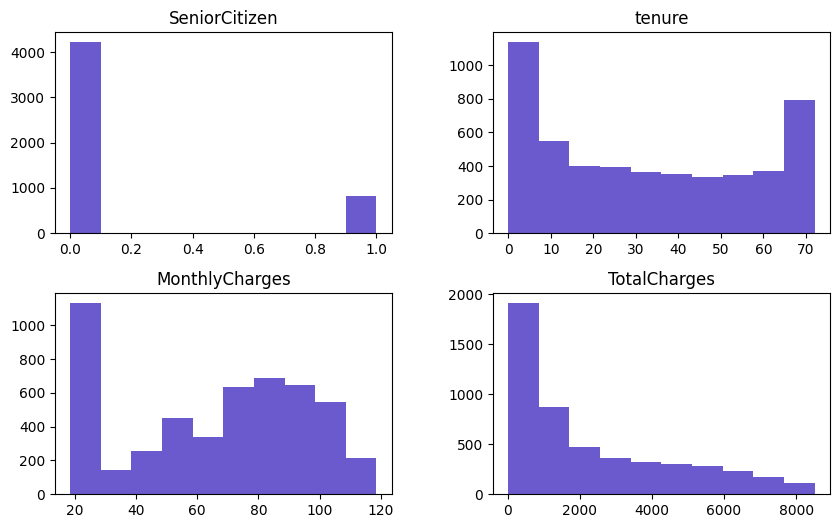

In [116]:


df.hist(figsize=(10, 6), grid=False, color="#6A5ACD")
plt.show()


In [117]:
correlation = df.corr(numeric_only=True)
correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.096079
tenure,0.004597,1.000000,0.240645,0.826830
MonthlyCharges,0.221780,0.240645,1.000000,0.647476
TotalCharges,0.096079,0.826830,0.647476,1.000000


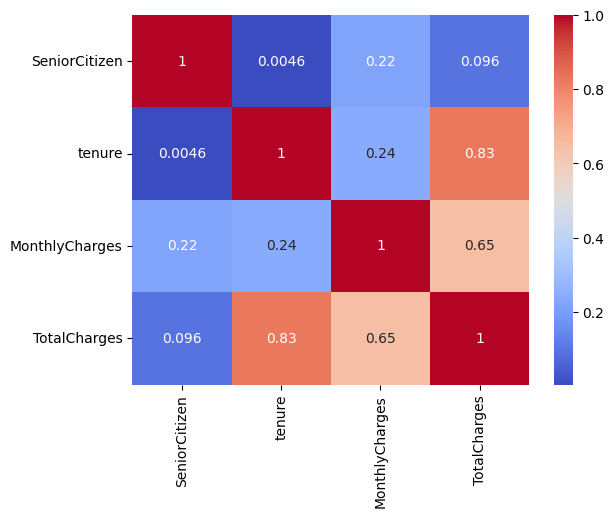

In [118]:
sns.heatmap(data= correlation,annot=True,cmap='coolwarm')
plt.show()

In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

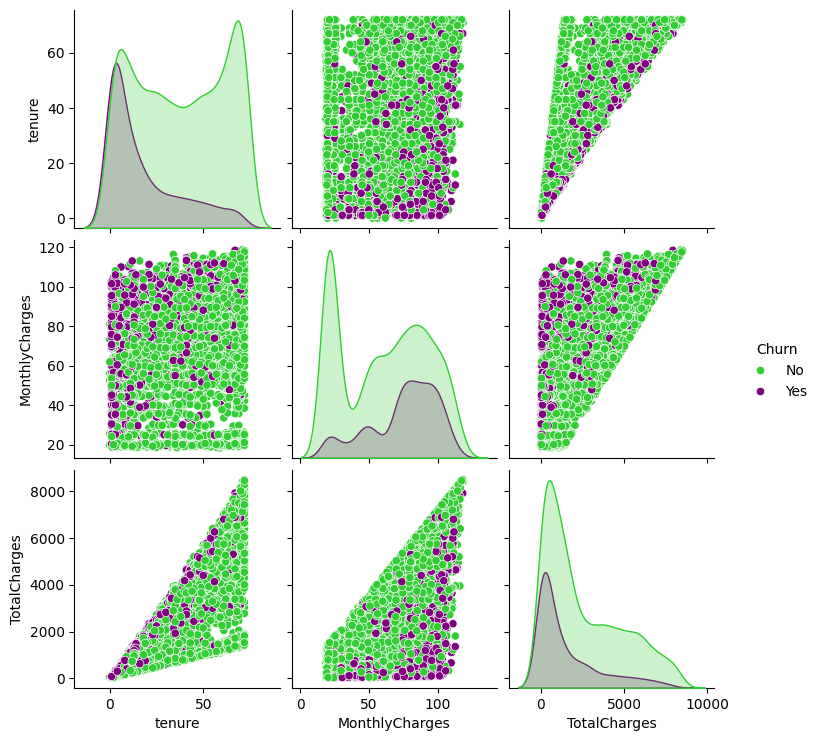

In [120]:
data = df[["Churn","tenure","Contract","MonthlyCharges","TotalCharges"]]
plt.figure(figsize=(12,6))
sns.pairplot(data,hue='Churn',palette={'Yes':"purple","No":"limegreen"})
plt.show()

## Answering Analytical Questions

1. What is perscantage of churn for Vodafone telecome companys

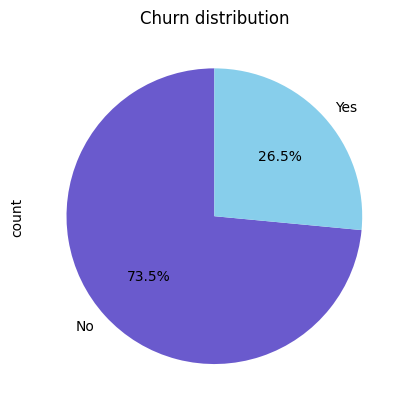

In [121]:
df["Churn"].value_counts().plot.pie(startangle=90, colors=["#6A5ACD", "skyblue"], autopct="%1.1f%%")
plt.title('Churn distribution')
plt.show()

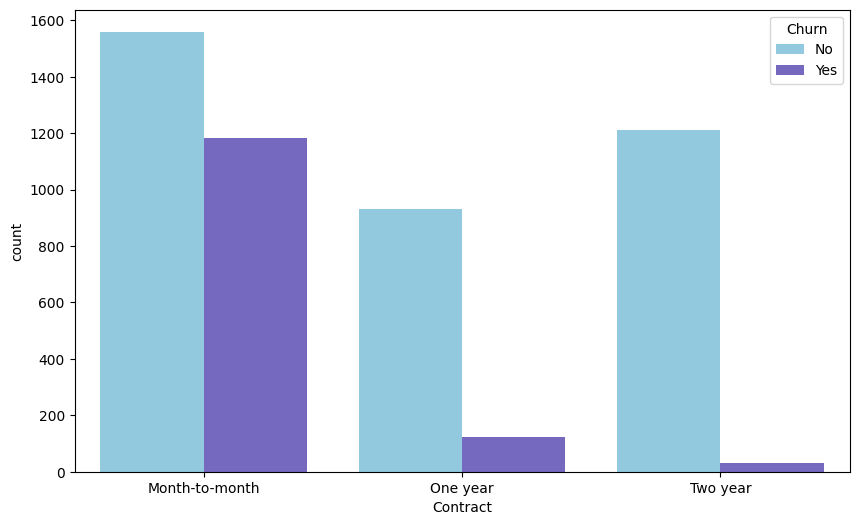

In [122]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Contract",hue="Churn",palette={'No':"skyblue",'Yes':"#6A5ACD"})
plt.show()

4. Is there a correlation between the total charges accrued by customers and the type of contract they have? 

In [123]:

correlation_df = df.groupby('Contract')['TotalCharges'].mean()


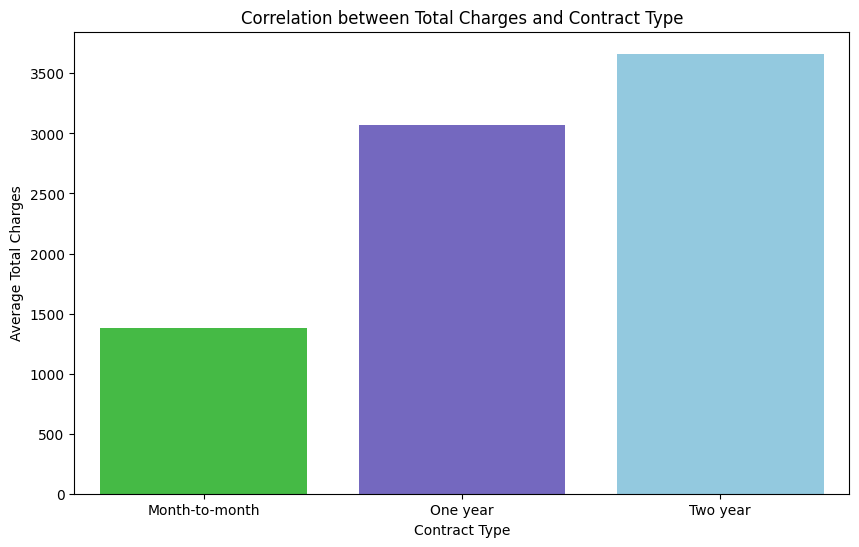

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df.index, y=correlation_df.values, palette={'skyblue',"#6A5ACD","limegreen"})
plt.title("Correlation between Total Charges and Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Average Total Charges")
plt.show()



### 5. What are the preferred payment methods?

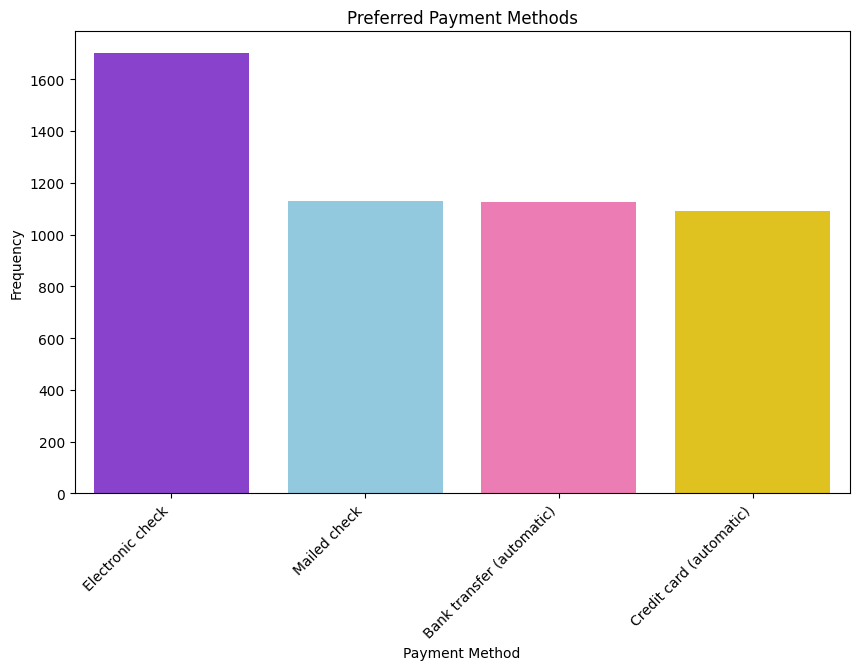

In [125]:

preferred_payment_methods = df['PaymentMethod'].value_counts()

custom_colors = ['#8a2be2', '#87ceeb', '#ff69b4', '#ffd700']  # Bright purple, sky blue, pink, and yellow
plt.figure(figsize=(10, 6))
sns.barplot(x=preferred_payment_methods.index, y=preferred_payment_methods.values, palette=custom_colors)
plt.title("Preferred Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


### Bivariate analysis

To test the hypothesis you've formulated, you can perform a statistical test, such as the Chi-Square Test for Independence. This test is commonly used when you want to determine if there is a significant association between two categorical variables. In your case, the categorical variables are "customer churn" and "termination of contract."

Here's a step-by-step guide on how to perform a Chi-Square Test for Independence in Python:These hypotheses articulate the idea that, in the population, there is no association between customer churn and the type of contract (Null Hypothesis), and the alternative hypothesis suggests that there is a significant association.

You can use the provided code to perform the Chi-Square Test for Independence on your data and assess whether you reject the null hypothesis in favor of the alternative hypothesis based on the calculated p-value.


In [126]:


# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['Contract'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set my significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between customer churn and the type of contract.")


Reject the null hypothesis. There is a significant relationship between customer churn and the type of contract.


## Conclusion



Based on the analysis and the Chi-Square Test for Independence, we reject the null hypothesis, indicating a significant relationship between customer churn and the type of contract. The bar plot illustrates a higher number of customers leaving the company, particularly among those with a Month-to-Month contract. This suggests that contract terms play a crucial role in customer retention. To enhance customer retention strategies, the marketing department should consider tailoring promotional efforts or loyalty programs to address the needs and preferences associated with different contract types. Specifically, for those with a Month-to-Month contract, they should put more effort into convincing them to consider other contract types, such as one year or two years. Additionally, targeted communication and incentives could be designed to encourage long-term commitment, thereby reducing the likelihood of churn within specific contract segments.

### Data Preparation

In [127]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1936.300026,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,107.699997,Yes


In [128]:
df['Churn'].fillna(df['Churn'].mode()[0], inplace=True)


In [129]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [130]:
df.drop("customerID", axis=1, inplace=True)


In [131]:
X = df.drop("Churn",axis=1)

In [132]:
y = df["Churn"]

#### Split data into training and evaluation

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

In [134]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2175,Female,0,No,No,30,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,85.150002,2554.500046
1022,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),18.900000,378.000000
1460,Male,0,No,No,5,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,85.300003,426.500015
2322,Female,0,No,Yes,49,Yes,No,No,None,None,None,None,None,None,Two year,No,Credit card (automatic),20.450001,1002.050037
2349,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),90.449997,6512.399780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.200000,285.600000
432,Female,0,No,No,2,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,76.400000,152.800000
19,Male,1,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.600000,1338.400000
2876,Male,0,No,No,19,Yes,No,No,None,None,None,None,None,None,One year,Yes,Credit card (automatic),19.700001,374.300014


Drop Customer Id ,because we are not going to use it any way

### Feature Engineering

In [135]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 
 17  

In [136]:
numeric_column = X.select_dtypes(include='number').columns
numeric_column

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [137]:
categorical_column = X.select_dtypes(include='object').columns
categorical_column

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### Pipelines

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
class LogTransform():
    def __init__(self,constant=10e-5):
        self.constant = constant
    
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return np.log1p(X+self.constant)


numerical_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('log_transformation',FunctionTransformer(LogTransform().transform)),
    ('scaler',RobustScaler())
    
])
categorical_pipeline = Pipeline(steps=[
    ('cate_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder()),
    
])
preprocessor = ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numeric_column),
    ('categorical_pipeline',categorical_pipeline,categorical_column)
])

### Label Encoding

In [139]:
labelEncoder = LabelEncoder()
y_train_encoded = labelEncoder.fit_transform(y_train)
y_test_encoded = labelEncoder.transform(y_test)

## ML Pipeline

### 1.DecisionTreeClassifier

In [140]:
from sklearn.tree import DecisionTreeClassifier



decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
decision_tree_pipeline.fit(X_train, y_train_encoded) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransform.transform of <__main__.LogTransform object at 0x00000272B6F10FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'Monthl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Evaluate

In [141]:
predict = decision_tree_pipeline.predict(X_test)     # Making predictions using the trained decision tree model on the test data


In [142]:

# Generate a classification report
report = classification_report(y_test_encoded, predict)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.83      0.77      0.80       742
           1       0.47      0.57      0.52       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.74      0.72      0.73      1009



In [143]:
_# Accessing the unique classes learned by the LabelEncoder
unique_classes = labelEncoder.classes_
unique_classes

array(['No', 'Yes'], dtype=object)

### 2. Support Vector Classification.

In [144]:

from sklearn.svm import SVC



SVC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc_classifier', SVC(random_state=42))
])

# Fit the pipeline on the training data
SVC_pipeline.fit(X_train, y_train_encoded) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransform.transform of <__main__.LogTransform object at 0x00000272B6F10FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'Monthl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('svc_classifier', SVC(random_state=42))])

### Evaluate 

In [145]:
svc_pred = SVC_pipeline.predict(X_test)     # Making predictions using the trained decision tree model on the test data


Classification report 

In [146]:
# Generate a classification report
report_svc = classification_report(y_test_encoded, svc_pred)

# Print the classification report
print(report_svc)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.67      0.54      0.60       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.74      1009
weighted avg       0.80      0.81      0.80      1009



### 3.RandomForestClassifier

In [168]:
from sklearn.ensemble  import RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf_classfier',RandomForestClassifier(random_state=42))
    ])
rf_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransform.transform of <__main__.LogTransform object at 0x00000272B6F10FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'Monthl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('rf_classfier', RandomForestClassifier(random_state=42))])

In [148]:
rf_pred = rf_pipeline.predict(X_test)

### Classification_report

In [149]:
# Generate a classification report
report_rf = classification_report(y_test_encoded, rf_pred)

# Print the classification report
print(report_rf)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       742
           1       0.62      0.54      0.58       267

    accuracy                           0.79      1009
   macro avg       0.73      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009



In [150]:
from sklearn.neighbors import KNeighborsClassifier
# Define the KNN pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        # Preprocessing steps
    ('knn_classifier', KNeighborsClassifier())  # KNN classifier
    ])
# Set random seed for the entire Python environment

# Fit the KNN pipeline on the training data
knn_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransform.transform of <__main__.LogTransform object at 0x00000272B6F10FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'Monthl...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('knn_classifier', KNeighborsClassifier())])

In [151]:
knn_pred = knn_pipeline.predict(X_test)

In [152]:
# Generate a classification report
report_knn = classification_report(y_test_encoded, knn_pred)

# Print the classification report
print(report_knn)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       742
           1       0.56      0.49      0.52       267

    accuracy                           0.76      1009
   macro avg       0.69      0.68      0.68      1009
weighted avg       0.75      0.76      0.76      1009



### Compare Models

In [153]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)


In [154]:


models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('svc_classifier', SVC(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn2_classifier', KNeighborsClassifier()),
]
import numpy as np
np.random.seed(42)

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions on the test data
    prediction = pipeline.predict(X_test)

    # Print classification report

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_encoded, prediction))
    print('='*50)

Classification Report for tree_classifier:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       742
           1       0.47      0.57      0.52       267

    accuracy                           0.72      1009
   macro avg       0.65      0.67      0.66      1009
weighted avg       0.74      0.72      0.73      1009

Classification Report for svc_classifier:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       742
           1       0.67      0.54      0.60       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.74      1009
weighted avg       0.80      0.81      0.80      1009

Classification Report for rf_classifier:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       742
           1       0.62      0.54      0.58       267

    accuracy                           0.79      1009
  

### Balance Data Set 

In [155]:
y_train.value_counts()

Churn
No     2965
Yes    1069
Name: count, dtype: int64

In [156]:

# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Create an instance of RandomOverSampler with a specified random state (random_state=42)
sampler = RandomOverSampler(random_state=42)

# Resample the training data using the fit_resample method
# X_train and y_train_encoded are the input features and target labels respectively
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)


In [157]:
X_train_resampled.shape

(5930, 19)

In [158]:
X_train.shape

(4034, 19)

In [159]:
pd.DataFrame(y_train_resampled).value_counts()

0    2965
1    2965
Name: count, dtype: int64

### Train and compared Balanced dataset

In [160]:


models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('svc_classifier', SVC(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn2_classifier', KNeighborsClassifier()),
]
import numpy as np
np.random.seed(42)

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    prediction = pipeline.predict(X_test)

    # Print classification report

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_encoded, prediction))
    print('='*50)

Classification Report for tree_classifier:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       742
           1       0.46      0.46      0.46       267

    accuracy                           0.71      1009
   macro avg       0.63      0.63      0.63      1009
weighted avg       0.71      0.71      0.71      1009

Classification Report for svc_classifier:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       742
           1       0.51      0.79      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009

Classification Report for rf_classifier:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       742
           1       0.59      0.62      0.61       267

    accuracy                           0.79      1009
  

In [161]:
#pd.DataFrame(preprocessor.fit_transform(X_train))

### Feature Importance and Selection

In [162]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

selection = SelectKBest(mutual_info_classif,k=7)

In [163]:

models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('svc_classifier', SVC(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
    ('knn2_classifier', KNeighborsClassifier()),
]
import numpy as np
np.random.seed(42)

for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_importance',selection),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test data
    prediction = pipeline.predict(X_test)

    # Print classification report

    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test_encoded, prediction))
    print('='*50)

Classification Report for tree_classifier:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       742
           1       0.47      0.51      0.49       267

    accuracy                           0.72      1009
   macro avg       0.64      0.65      0.65      1009
weighted avg       0.73      0.72      0.72      1009



Classification Report for svc_classifier:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       742
           1       0.49      0.85      0.62       267

    accuracy                           0.72      1009
   macro avg       0.71      0.76      0.70      1009
weighted avg       0.81      0.72      0.74      1009

Classification Report for rf_classifier:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       742
           1       0.51      0.57      0.54       267

    accuracy                           0.74      1009
   macro avg       0.68      0.69      0.68      1009
weighted avg       0.75      0.74      0.75      1009

Classification Report for knn2_classifier:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       742
           1       0.46      0.71      0.56       267

    accuracy                           0.70      1009
  

In [164]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.000000,0.000000,0.203604,0.265863,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,-0.223771,-1.397075,-0.589295,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000000,-0.943553,0.205504,-0.535338,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.274660,-1.315144,-0.153189,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.492095,0.268819,0.685099,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.000000,-1.176513,0.324132,-0.714513,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4030,0.000000,-1.341799,0.086611,-0.993417,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,0.693097,-0.417093,0.328664,-0.023613,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4032,0.000000,-0.251803,-1.354021,-0.593691,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
preprocessor_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
selected_feature_indices = selection.get_support(indices=True)
selected_feature_indices = preprocessor_names[selected_feature_indices]
pd.DataFrame(selected_feature_indices)

In [176]:
from sklearn.ensemble  import RandomForestClassifier
rf_pipeline_balanced = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('feature_importance',selection),

    ('rf_classfier',RandomForestClassifier(random_state=42))
    ])
rf_pipeline_balanced.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransform.transform of <__main__.LogTransform object at 0x00000272B6F10FA0>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'Monthl...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=7,
                             score_func=<function mutual_info_classif at 0x00000272B9A0D120>)),
                ('rf_classfier', RandomForestClassifier(random_state=42))])

In [167]:
from sklearn.metrics import confusion_matrix
rf_y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test_encoded,rf_y_pred))

[[513 229]
 [ 51 216]]


### ROC-AUC

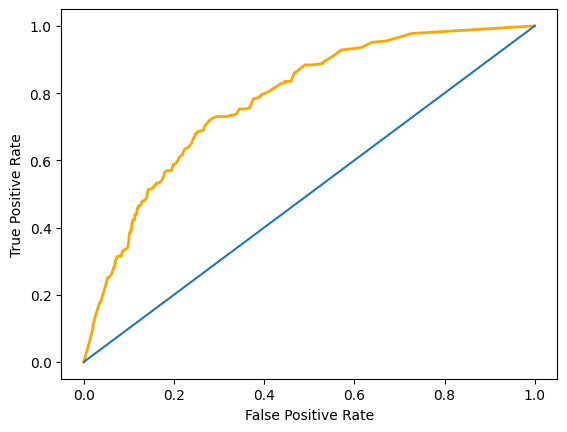

In [184]:
from sklearn.metrics import roc_auc_score, auc,roc_curve
y_pred_probab = rf_pipeline_balanced.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test_encoded,y_pred_probab)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,color='orange',lw=2,label=f'ROC CURVE{roc_auc:.2f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend

plt.plot([0,1],[0,1])
plt.show()

In [185]:
df2 = pd.DataFrame(zip(fpr,tpr,threshold), columns=['False Positive','True Positive','threshold'])
df2.head()

,False Positive,True Positive,threshold
0,0.000000,0.000000,inf
1,0.020216,0.097378,1.000000
2,0.020216,0.108614,0.993333
3,0.026954,0.142322,0.990000
4,0.035040,0.176030,0.980000


Model Persistance 

In [186]:
import joblib 

joblib.dump(rf_pipeline_balanced,'randomforestmodel.joblib')

['randomforestmodel.joblib']

In [ ]:


# Assuming y_test_encoded contains the actual labels for the test set
# pred contains the predicted labels

# Generate a confusion matrix
cm = confusion_matrix(y_test_encoded, pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

